<a href="https://colab.research.google.com/github/Fet-elena/proba/blob/main/HW_4_Fetisova_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
RANDOM_STATE = 42
results = pd.DataFrame(columns = ['model', 'task', 'accuracy'])

In [ ]:
!wget "https://archive.ics.uci.edu/static/public/186/wine+quality.zip"

--2024-03-03 15:24:53--  https://archive.ics.uci.edu/static/public/186/wine+quality.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘wine+quality.zip’

wine+quality.zip        [ <=>                ]  89.21K  --.-KB/s    in 0.03s   

2024-03-03 15:24:53 (3.37 MB/s) - ‘wine+quality.zip’ saved [91353]



https://archive.ics.uci.edu/ml/datasets/wine+quality

In [ ]:
!unzip "wine+quality.zip"

Archive:  wine+quality.zip
  inflating: winequality-red.csv     
  inflating: winequality-white.csv   
  inflating: winequality.names       


In [ ]:
data = pd.read_csv('winequality-red.csv', sep = ';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


1.Разделите выборку на обучающую и тестовую в отношении 70%/30%, предварительно выделив целевую переменную (колонка 'quality').

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(columns = ['quality'])
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

2.Оцените качество на тестовой выборке по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
dtc = DecisionTreeClassifier(random_state = RANDOM_STATE)
bc = BaggingClassifier(n_estimators = 100, random_state = RANDOM_STATE)
rfc = RandomForestClassifier(n_estimators = 100, random_state = RANDOM_STATE)

dtc.fit(X_train, y_train)
pred_dtc = dtc.predict(X_test)

bc.fit(X_train, y_train)
pred_bc = bc.predict(X_test)

rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

acc_DT = accuracy_score(y_test, pred_dtc)
acc_Bagging = accuracy_score(y_test, pred_bc)
acc_RF = accuracy_score(y_test, pred_rfc)

results.loc[0] = ['DecisionTreeClassifier', 'task2', acc_DT]
results.loc[1] = ['BaggingClassifier ', 'task2', acc_Bagging]
results.loc[2] = ['RandomForestClassifier', 'task2', acc_RF]

In [ ]:
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.604167
1,BaggingClassifier,task2,0.697917
2,RandomForestClassifier,task2,0.716667


3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



<Axes: xlabel='tree_cnt'>

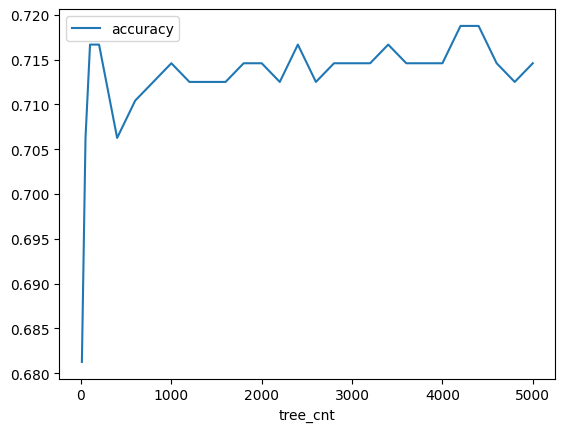

In [ ]:
mass = [10, 50, 100] + list(range(200, 5001, 200))
tmp_results =  pd.DataFrame(columns = ['tree_cnt', 'accuracy'])

for i, trees in enumerate(mass):
  rfc = RandomForestClassifier(n_estimators = trees , random_state = RANDOM_STATE)
  rfc.fit(X_train, y_train)
  pred_rfc = rfc.predict(X_test)
  tmp_results.loc[i] = [trees, accuracy_score(y_test, pred_rfc)]


tmp_results.plot(kind = 'line', x = 'tree_cnt', y= 'accuracy')

4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [ ]:
!pip install xgboost -q

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb = LabelEncoder()
y_temp = lb.fit_transform(y)
y_temp

array([2, 2, 2, ..., 3, 2, 3])

In [ ]:
gbc = GradientBoostingClassifier()
xgbc = XGBClassifier()

acc_sklearn = np.array(cross_val_score(gbc, X, y, scoring = "accuracy")).mean()
acc_xgboost = np.array(cross_val_score(xgbc, X, y_temp, scoring = "accuracy", error_score = "raise")).mean()

results.loc[3] = ['GradientBoostingClassifier', 'task4', acc_sklearn]
results.loc[4] = ['XGBClassifier', 'task4', acc_xgboost]

In [ ]:
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.604167
1,BaggingClassifier,task2,0.697917
2,RandomForestClassifier,task2,0.716667
3,GradientBoostingClassifier,task4,0.565976
4,XGBClassifier,task4,0.541597


5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:

parameters = {'learning_rate':np.linspace(0, 0.01, 10), 'n_estimators':range(1, 10), "max_depth":range(1, 5)}
gs_gbc = GridSearchCV(gbc, parameters, scoring = "accuracy")
gs_gbc.fit(X, y)

gs_xgbc = GridSearchCV(xgbc, parameters, scoring = "accuracy")
gs_xgbc.fit(X, y_temp)

### Ваш код ###

best_params_sklearn = gs_gbc.best_params_
print('Параметры лучшей модели sklearn:\n', best_params_sklearn)
best_params_xgboost = gs_xgbc.best_params_
print('Параметры лучшей модели xgboost:\n', best_params_xgboost)
acc_sklearn_cv = gs_gbc.best_score_
acc_xgboost_cv = gs_xgbc.best_score_
results.loc[5] = ['GradientBoostingClassifier_CV', 'task5', acc_sklearn_cv]
results.loc[6] = ['XGBClassifier_CV', 'task5', acc_xgboost_cv]

Параметры лучшей модели sklearn:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 9}
Параметры лучшей модели xgboost:
 {'learning_rate': 0.006666666666666666, 'max_depth': 3, 'n_estimators': 6}


In [ ]:
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.604167
1,BaggingClassifier,task2,0.697917
2,RandomForestClassifier,task2,0.716667
3,GradientBoostingClassifier,task4,0.565976
4,XGBClassifier,task4,0.541597
5,GradientBoostingClassifier_CV,task5,0.553482
6,XGBClassifier_CV,task5,0.581628


6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [ ]:
!pip install catboost
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 6.3 MB/s eta 0:00:00


In [ ]:
lgbm = LGBMClassifier()
cat= CatBoostClassifier()

acc_lgbm = np.array(cross_val_score(lgbm, X, y, scoring = "accuracy")).mean()
acc_cat = np.array(cross_val_score(cat, X, y, scoring = "accuracy")).mean()

acc_lightgbm = acc_lgbm
acc_catboost = acc_cat
results.loc[7] = ['LGBMClassifier', 'task6', acc_lightgbm]
results.loc[8] = ['CatBoostClassifier', 'task6', acc_catboost]

In [ ]:
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.604167
1,BaggingClassifier,task2,0.697917
2,RandomForestClassifier,task2,0.716667
3,GradientBoostingClassifier,task4,0.565976
4,XGBClassifier,task4,0.541597
5,GradientBoostingClassifier_CV,task5,0.553482
6,XGBClassifier_CV,task5,0.581628
7,LGBMClassifier,task6,0.557247
8,CatBoostClassifier,task6,0.545976


Самый лучший результат получился у GradientBoostingClassifier, то есть у стандартного градиентного бустинга из sklearn

7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями.
Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [ ]:

parameters = {'learning_rate':np.linspace(0, 0.01, 10), 'n_estimators':range(1, 10), "max_depth":range(1, 5)}
gs_lgbm = GridSearchCV(lgbm, parameters, scoring = "accuracy")
gs_lgbm.fit(X, y)

gs_cat = GridSearchCV(cat, parameters, scoring = "accuracy")
gs_cat.fit(X, y)

acc_sklearn_cv = gs_gbc.best_score_


best_params_lightgbm =  gs_lgbm.best_params_
print('Параметры лучшей модели lightgbm:\n', best_params_lightgbm)
best_params_catboost = gs_cat.best_params_
print('Параметры лучшей модели catboost:\n', best_params_catboost)
acc_lightgbm_cv = gs_lgbm.best_score_
acc_catboost_cv = gs_cat.best_score_
results.loc[9] = ['LGBMClassifier_CV', 'task7', acc_lightgbm_cv]
results.loc[10] = ['CatBoostClassifier_CV', 'task7', acc_catboost_cv]

In [ ]:
print('Параметры лучшей модели lightgbm:\n', best_params_lightgbm)
best_params_catboost = gs_cat.best_params_
print('Параметры лучшей модели catboost:\n', best_params_catboost)
acc_lightgbm_cv = gs_lgbm.best_score_

Параметры лучшей модели lightgbm:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 9}
Параметры лучшей модели catboost:
 {'learning_rate': 0.006666666666666666, 'max_depth': 2, 'n_estimators': 8}


In [ ]:
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.604167
1,BaggingClassifier,task2,0.697917
2,RandomForestClassifier,task2,0.716667
3,GradientBoostingClassifier,task4,0.565976
4,XGBClassifier,task4,0.541597
5,GradientBoostingClassifier_CV,task5,0.553482
6,XGBClassifier_CV,task5,0.581628
7,LGBMClassifier,task6,0.557247
8,CatBoostClassifier,task6,0.545976
9,LGBMClassifier_CV,task7,0.554732


лучшие результаты из cv получились у XGBClassifier_CV

8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [optuna](https://github.com/optuna/optuna) . Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [ ]:
! pip install optuna
import optuna

In [ ]:
import xgboost as xgb
import sklearn

parameters = {'learning_rate':np.linspace(0, 0.01, 10), 'n_estimators':range(1, 10), "max_depth":range(1, 5)}


def objective(trial):
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_test, label=y_test)

    param = {
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 1, 100),
        "max_depth":  trial.suggest_int("max_depth", 1, 15)
    }

    # Add a callback for pruning.
    # pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation-merror")
    bst = xgb.train(param, dtrain, evals=[(dvalid, "validation")])
    preds = bst.predict(dvalid)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(y_test, pred_labels)
    return accuracy

study = optuna.create_study(
        pruner=optuna.pruners.MedianPruner(n_warmup_steps=5), direction="maximize"
    )
study.optimize(objective, n_trials = 100)

best_params_xgboost_optuna = study.best_params
print('Параметры лучшей модели xgboost:\n', best_params_xgboost_optuna)
acc_xgboost_optuna = study.best_value
results.loc[11] = ['XGBClassifier_optuna', 'task8', acc_xgboost_optuna]

In [ ]:
print('Параметры лучшей модели xgboost:\n', best_params_xgboost_optuna)

Параметры лучшей модели xgboost:
 {'learning_rate': 0.3592900196974325, 'n_estimators': 77, 'max_depth': 15}


In [ ]:
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.604167
1,BaggingClassifier,task2,0.697917
2,RandomForestClassifier,task2,0.716667
3,GradientBoostingClassifier,task4,0.565976
4,XGBClassifier,task4,0.541597
5,GradientBoostingClassifier_CV,task5,0.553482
6,XGBClassifier_CV,task5,0.581628
7,LGBMClassifier,task6,0.557247
8,CatBoostClassifier,task6,0.545976
9,LGBMClassifier_CV,task7,0.554732


9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [ ]:
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier([('gbc', gbc), ('xgbc', xgbc), ('lgbm', lgbm), ('cat', cat)])

acc_stacking_default = stack.fit(X_train, y_train).score(X_test, y_test)

results.loc[12] = ['Stacking default', 'task9', acc_stacking_default]

In [ ]:
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.604167
1,BaggingClassifier,task2,0.697917
2,RandomForestClassifier,task2,0.716667
3,GradientBoostingClassifier,task4,0.565976
4,XGBClassifier,task4,0.541597
5,GradientBoostingClassifier_CV,task5,0.553482
6,XGBClassifier_CV,task5,0.581628
7,LGBMClassifier,task6,0.557247
8,CatBoostClassifier,task6,0.545976
9,LGBMClassifier_CV,task7,0.554732


10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

Параметры лучшей модели sklearn:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 9}

Параметры лучшей модели xgboost:
 {'learning_rate': 0.3592900196974325, 'n_estimators': 77, 'max_depth': 15}

 Параметры лучшей модели lightgbm:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 9}

Параметры лучшей модели catboost:
 {'learning_rate': 0.006666666666666666, 'max_depth': 2, 'n_estimators': 8}

In [ ]:
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier([('gbc', GradientBoostingClassifier(learning_rate = 0.01, max_depth = 4, n_estimators= 9)),
                            ('xgbc', XGBClassifier(learning_rate= 0.3592900196974325, n_estimators = 77, max_depth = 15)),
                            ('lgbm', LGBMClassifier(learning_rate= 0.01, max_depth= 4, n_estimators= 9)),
                             ('cat', CatBoostClassifier(learning_rate= 0.006666666666666666, max_depth= 2, n_estimators= 8))])

acc_stacking = stack.fit(X_train, y_train).score(X_test, y_test)
results.loc[13] = ['Stacking', 'task10', acc_stacking]

In [ ]:
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.604167
1,BaggingClassifier,task2,0.697917
2,RandomForestClassifier,task2,0.716667
3,GradientBoostingClassifier,task4,0.565976
4,XGBClassifier,task4,0.541597
5,GradientBoostingClassifier_CV,task5,0.553482
6,XGBClassifier_CV,task5,0.581628
7,LGBMClassifier,task6,0.557247
8,CatBoostClassifier,task6,0.545976
9,LGBMClassifier_CV,task7,0.554732


Получается, что при выборе лучших параметров конкретных моделей - не факт, что стэкинг этих алгоритмов тоже будет лучшим, так как у дефолтных параметров стэкинг выдал лучший результат